# PRÁCTICA 3: MCIB-19P
# Análisis de Señales Bioeléctricas

## Actividad 1

In [1]:
"""Importación de librerías y funciones necesarias"""
import os
import numpy                as np
import matplotlib.pyplot    as plt
from   scipy.signal         import butter, filtfilt, welch, csd, find_peaks, hilbert

#### 1. Seleccionar un registro de los realizados en la práctica 0

In [2]:
"""Configuración del path de datos"""
datpath = os.path.abspath('../../data')
print(datpath)

C:\Users\enriq\MCIB-19-P\data


In [3]:
"""Apertura de registro seleccionado"""
A2_6_f = np.load(datpath+'//'+'A2_6_f.npz')

for i in A2_6_f.keys():
    print(i)

PO2
EMG
EKG
RSP
PUL
sr


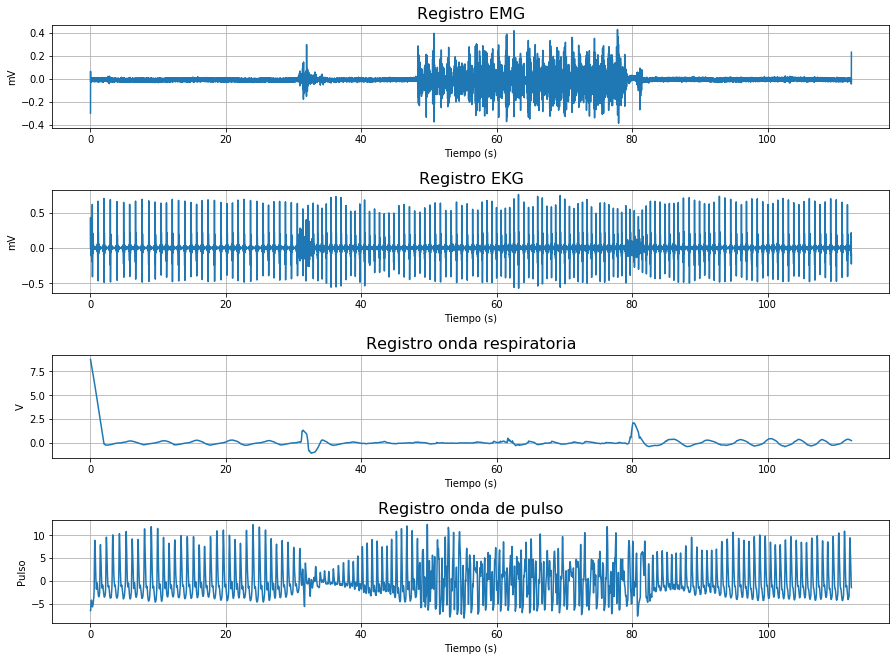

In [4]:
"""Obtención de potenciales bioeléctricos y frecuencia de muestreo"""
#Frecuencia de muestreo
sr  = A2_6_f['sr'].copy()

#Potenciales bioeléctricos
EMG = A2_6_f['EMG'][:,np.newaxis].copy()
EKG = A2_6_f['EKG'][:,np.newaxis].copy()
RSP = A2_6_f['RSP'][:,np.newaxis].copy()
PUL = A2_6_f['PUL'][:,np.newaxis].copy()

#Eje de tiempo para el registro seleccionado
time = np.linspace(0,EMG.shape[0]/sr,EMG.shape[0])

#Gráficas del registro completo
plt.figure(figsize = (15,11))
plt.subplot(4,1,1)
plt.plot(time,EMG)
plt.title('Registro EMG',fontsize=16)
plt.xlabel('Tiempo (s)')
plt.ylabel('mV')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(time,EKG)
plt.title('Registro EKG',fontsize=16)
plt.xlabel('Tiempo (s)')
plt.ylabel('mV')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(time,RSP)
plt.title('Registro onda respiratoria',fontsize=16)
plt.xlabel('Tiempo (s)')
plt.ylabel('V')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(time,PUL)
plt.title('Registro onda de pulso',fontsize=16)
plt.xlabel('Tiempo (s)')
plt.ylabel('Pulso')
plt.grid(True)

plt.subplots_adjust(hspace=.6)

plt.show()

#### 2. Acondicionar los registros

In [5]:
"""Recorte de registro para retirar artefacto generado por dentrend"""
#Variable para realizar recorte de registro
L   = 3000

EMG = EMG[L:]
EKG = EKG[L:]
RSP = RSP[L:]
PUL = PUL[L:]
time = time[L:]

"""Filtrando la señal respiratoria"""
fc  = np.array([3])/sr
N   = 2
b,a = butter(N,fc,btype='low')
RSP = filtfilt(b,a,RSP[:,0])[:,np.newaxis]

#### 3. Segmentar el registro en partes basales y con actividad

In [6]:
"""Función para realizar segmentación de los registros"""
"""NOTA: LOS LÍMITES DE ESTA FUNCIÓN SON ESPECÍFICOS PARA EL REGISTRO CON EL QUE SE ESTÁ TRABAJANDO.
         SI EL REGISTRO CAMBIA ENTONCES SE TENDRÁ QUE CAMBIAR LOS LÍMITES DE ESTA FUNCIÓN"""
#X: señal a segmentar
def segmen(X):
    #Segmentación de señal
    X_b  = X[11000:21000]
    X_r1 = X[35000:45000]
    X_a  = X[59000:69000]
    X_r2 = X[84000:94000]
    
    X_all = np.concatenate((X_b,X_r1,X_a,X_r2),axis=1)
    
    return X_all.copy()

In [7]:
"""Segmentación de registro original"""
EMG_seg = segmen(EMG)
EKG_seg = segmen(EKG)
RSP_seg = segmen(RSP)
PUL_seg = segmen(PUL)

#### 4. Reescalar las señales: a) z-score, y b) Intervalo [-1,1]

In [8]:
"""Función para realizar reescalamiento z-score"""
def z_score (param):
    prom = param.mean()
    st   = param.std()
    scor = (param- prom)/st
    return scor.copy()

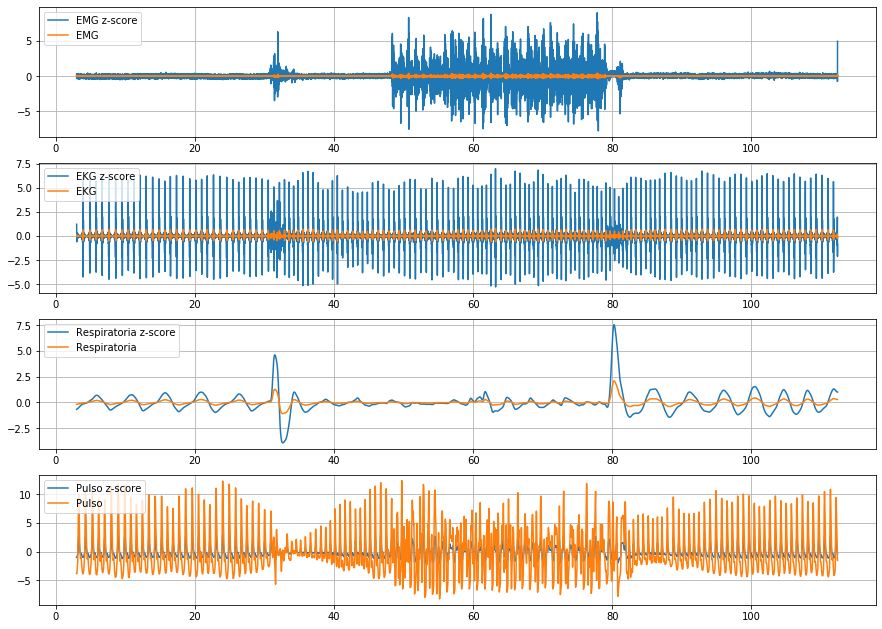

In [9]:
"""Rescalando la señal Z score"""

EMGz = z_score(EMG)
EKGz = z_score(EKG)
RSPz = z_score(RSP)
PULz = z_score(PUL)

plt.figure(figsize = (15,11))
plt.subplot(4,1,1)
plt.plot(time,EMGz, label = "EMG z-score")
plt.plot(time,EMG, label = "EMG")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(time,EKGz, label = "EKG z-score")
plt.plot(time,EKG, label = "EKG")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(time,RSPz,label = "Respiratoria z-score")
plt.plot(time,RSP,label = "Respiratoria")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(time,PULz, label = "Pulso z-score")
plt.plot(time,PUL,label = "Pulso")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.show()

In [10]:
"""Función para realizar reescalamiento [-1,1]"""
def recta (param):
    y2 = 1
    y1 = -1
    x2 = max(param)
    x1 = min(param)
    m  = (y2-y1)/(x2-x1)
    b  = y2-(m*x2)
    rec = (m*param)+b
    return rec.copy()

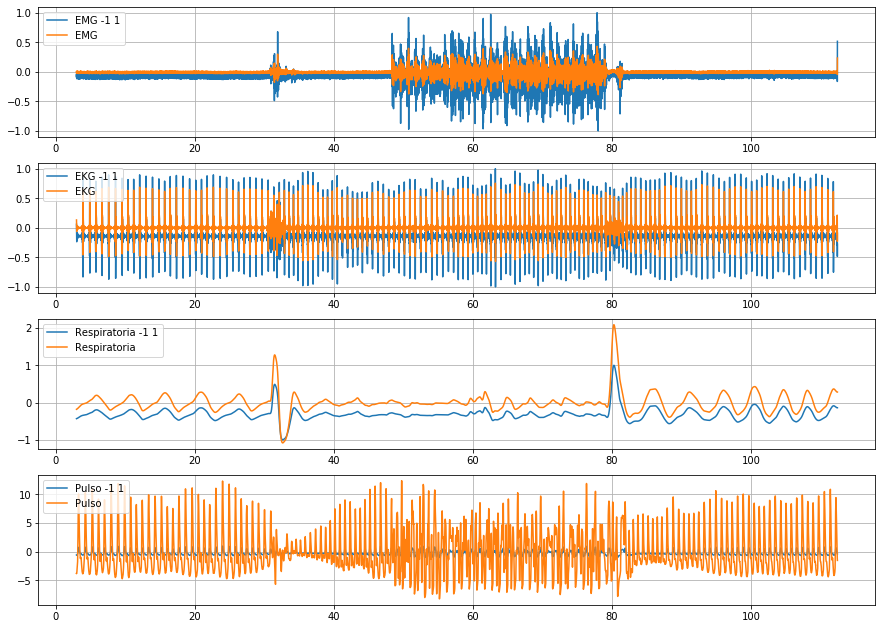

In [11]:
"""Rrescalando la señal en intervalo [-1 1]"""
EMGr = recta(EMG)
EKGr = recta(EKG)
RSPr = recta(RSP)
PULr = recta(PUL)

plt.figure(figsize = (15,11))
plt.subplot(4,1,1)
plt.plot(time,EMGr, label = "EMG -1 1")
plt.plot(time,EMG , label = "EMG")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(time,EKGr,label = "EKG -1 1")
plt.plot(time,EKG ,label = "EKG")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(time,RSPr,label = "Respiratoria -1 1")
plt.plot(time,RSP, label = "Respiratoria")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(time,PULr,label = "Pulso -1 1")
plt.plot(time,PUL, label = "Pulso")
plt.legend(loc = 'upper left')
plt.grid(True)

plt.show()

#### 5. Estimar la función de densidad de probabilidad de cada señal antes y despues de reescalar; compare los resultados

In [12]:
""""Función para estimar densidad de probabilidad"""
def histogram(s,nbins=10,width=0.5):
    intervals = np.linspace( s.min(),s.max(),nbins+1)
    
    left = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right= s[:,np.newaxis] < intervals[1:] [np.newaxis]
    hist = (left*right).sum(axis=0)
    return(intervals[:-1],hist)

In [13]:
"""Obtención de densidad de probabalidad para cada registro"""
#Cálculo para obtener un número de bins óptimo para el registro
n_bins = int(np.sqrt(EMG.shape[0]))

I_EMG ,hist_EMG  = histogram(EMG [:,0],n_bins)
I_EMGz,hist_EMGz = histogram(EMGz[:,0],n_bins)
I_EMGr,hist_EMGr = histogram(EMGr[:,0],n_bins)

I_EKG ,hist_EKG  = histogram(EKG [:,0],n_bins)
I_EKGz,hist_EKGz = histogram(EKGz[:,0],n_bins)
I_EKGr,hist_EKGr = histogram(EKGr[:,0],n_bins)

I_RSP ,hist_RSP  = histogram(RSP [:,0],n_bins)
I_RSPz,hist_RSPz = histogram(RSPz[:,0],n_bins)
I_RSPr,hist_RSPr = histogram(RSPr[:,0],n_bins)

I_PUL ,hist_PUL  = histogram(PUL [:,0],n_bins)
I_PULz,hist_PULz = histogram(PULz[:,0],n_bins)
I_PULr,hist_PULr = histogram(PULr[:,0],n_bins)

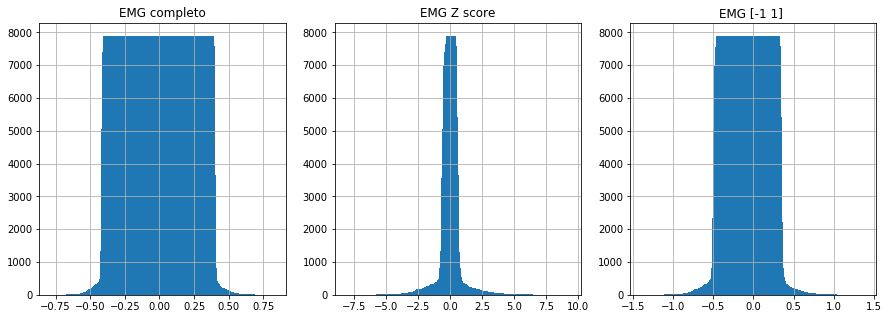

In [14]:
"""Densidad de probabilidad para registro de EMG"""
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.bar(I_EMG,hist_EMG)
plt.title('EMG completo')
plt.grid(True)

plt.subplot(1,3,2)
plt.bar(I_EMGz,hist_EMGz)
plt.title('EMG Z score')
plt.grid(True)

plt.subplot(1,3,3)
plt.bar(I_EMGr,hist_EMGr)
plt.title('EMG [-1 1] ')
plt.grid(True)

plt.show()

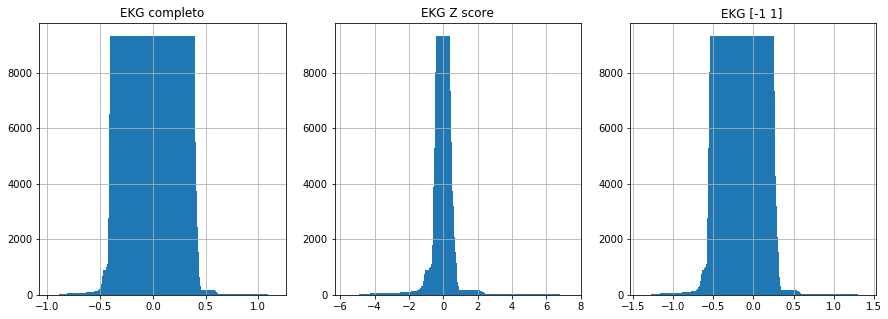

In [15]:
"""Densidad de probabilidad para registro de EKG"""
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.bar(I_EKG,hist_EKG)
plt.title('EKG completo')
plt.grid(True)

plt.subplot(1,3,2)
plt.bar(I_EKGz,hist_EKGz)
plt.title('EKG Z score')
plt.grid(True)

plt.subplot(1,3,3)
plt.bar(I_EKGr,hist_EKGr)
plt.title('EKG [-1 1] ')
plt.grid(True)

plt.show()

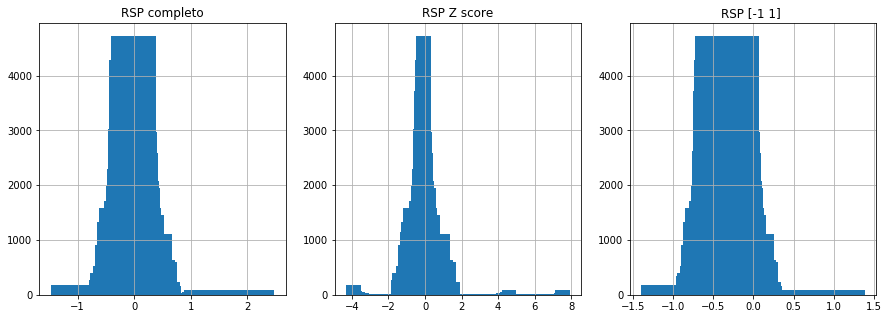

In [16]:
"""Densidad de probabilidad para registro de RSP"""
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.bar(I_RSP,hist_RSP)
plt.title('RSP completo')
plt.grid(True)

plt.subplot(1,3,2)
plt.bar(I_RSPz,hist_RSPz)
plt.title('RSP Z score')
plt.grid(True)

plt.subplot(1,3,3)
plt.bar(I_RSPr,hist_RSPr)
plt.title('RSP [-1 1] ')
plt.grid(True)

plt.show()

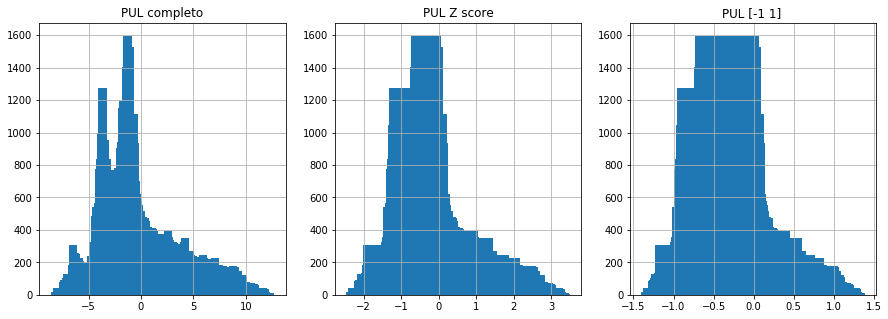

In [17]:
"""Densidad de probabilidad para registro de PUL"""
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.bar(I_PUL,hist_PUL)
plt.title('PUL completo')
plt.grid(True)

plt.subplot(1,3,2)
plt.bar(I_PULz,hist_PULz)
plt.title('PUL Z score')
plt.grid(True)

plt.subplot(1,3,3)
plt.bar(I_PULr,hist_PULr)
plt.title('PUL [-1 1] ')
plt.grid(True)

plt.show()

#### 6. Utilice métricas de relación entre procesos estocásticos para indicar cuales señales se encuentran relacionadas

In [18]:
"""Función para obtención de coeficientes de correlación de Pearson"""
def corre_per(X1,X2):
    S = np.cov(X1,X2)
    r = S[0,1]/np.product( np.sqrt( S.diagonal() ) )
    return r

In [19]:
"""Correlación entre registros completos"""
#Se utilizarán los registros acondicionados con z-score
EKG_PUL = corre_per(EKGz[:,0],PULz[:,0])
EKG_RSP = corre_per(EKGz[:,0],RSPz[:,0])
EKG_EMG = corre_per(EKGz[:,0],EMGz[:,0])
EMG_RSP = corre_per(EMGz[:,0],RSPz[:,0])
EMG_PUL = corre_per(EMGz[:,0],PULz[:,0])
PUL_RSP = corre_per(PULz[:,0],RSPz[:,0])

print ('Coeficientes de correlación para señales completas\n')
print ('EKG-Pulso:          %f \n'%EKG_PUL)
print ('EKG-REspiratoria:  %f \n'%EKG_RSP)
print ('EKG-EMG:            %f \n'%EKG_EMG)
print ('EMG-Respiraotia:    %f \n'%EMG_RSP)
print ('EMG-Pulso:          %f \n'%EMG_PUL)
print ('Pulso-Respiratoria: %f \n'%PUL_RSP)

Coeficientes de correlación para señales completas

EKG-Pulso:          0.000028 

EKG-REspiratoria:  -0.000035 

EKG-EMG:            0.006888 

EMG-Respiraotia:    0.014151 

EMG-Pulso:          0.004222 

Pulso-Respiratoria: 0.004340 



In [20]:
"""Segmentación de registros acondicionados con z-score"""
EMGz_seg = segmen(EMGz)
EKGz_seg = segmen(EKGz)
RSPz_seg = segmen(RSPz)
PULz_seg = segmen(PULz)

In [21]:
"""Correlación en periodo basal"""
EKG_PUL_b = corre_per(EKGz_seg[:,0],PULz_seg[:,0])  
EKG_RSP_b = corre_per(EKGz_seg[:,0],RSPz_seg[:,0])
EKG_EMG_b = corre_per(EKGz_seg[:,0],EMGz_seg[:,0])
EMG_RSP_b = corre_per(EMGz_seg[:,0],RSPz_seg[:,0])
EMG_PUL_b = corre_per(EMGz_seg[:,0],PULz_seg[:,0])
PUL_RSP_b = corre_per(PULz_seg[:,0],RSPz_seg[:,0])

print ('Coeficientes de correlación para periodo basal \n')
print ('EKG-Pulso:         %f \n'%EKG_PUL_b)
print ('EKG-REspiratoria:   %f \n'%EKG_RSP_b)
print ('EKG-EMG:            %f \n'%EKG_EMG_b)
print ('EMG-Respiraotia:    %f \n'%EMG_RSP_b)
print ('EMG-Pulso:         %f \n'%EMG_PUL_b)
print ('Pulso-Respiratoria: %f \n'%PUL_RSP_b)

Coeficientes de correlación para periodo basal 

EKG-Pulso:         -0.000954 

EKG-REspiratoria:   0.000196 

EKG-EMG:            0.030549 

EMG-Respiraotia:    0.079110 

EMG-Pulso:         -0.000649 

Pulso-Respiratoria: 0.001019 



In [22]:
"""Correlación en periodo de recuperación 1"""
EKG_PUL_r1 = corre_per(EKGz_seg[:,1],PULz_seg[:,1])  
EKG_RSP_r1 = corre_per(EKGz_seg[:,1],RSPz_seg[:,1])
EKG_EMG_r1 = corre_per(EKGz_seg[:,1],EMGz_seg[:,1])
EMG_RSP_r1 = corre_per(EMGz_seg[:,1],RSPz_seg[:,1])
EMG_PUL_r1 = corre_per(EMGz_seg[:,1],PULz_seg[:,1])
PUL_RSP_r1 = corre_per(PULz_seg[:,1],RSPz_seg[:,1])

print ('Coeficientes de correlación para periodo recuperación 1 \n')
print ('EKG-Pulso:           %f \n'%EKG_PUL_r1)
print ('EKG-REspiratoria:   %f \n'%EKG_RSP_r1)
print ('EKG-EMG:             %f \n'%EKG_EMG_r1)
print ('EMG-Respiraotia:     %f \n'%EMG_RSP_r1)
print ('EMG-Pulso:          %f \n'%EMG_PUL_r1)
print ('Pulso-Respiratoria: %f \n'%PUL_RSP_r1)

Coeficientes de correlación para periodo recuperación 1 

EKG-Pulso:           0.000313 

EKG-REspiratoria:   -0.000267 

EKG-EMG:             0.027901 

EMG-Respiraotia:     0.018467 

EMG-Pulso:          -0.033324 

Pulso-Respiratoria: -0.032214 



In [23]:
"""Correlación en periodo de actividad"""
EKG_PUL_a = corre_per(EKGz_seg[:,2],PULz_seg[:,2])  
EKG_RSP_a = corre_per(EKGz_seg[:,2],RSPz_seg[:,2])
EKG_EMG_a = corre_per(EKGz_seg[:,2],EMGz_seg[:,2])
EMG_RSP_a = corre_per(EMGz_seg[:,2],RSPz_seg[:,2])
EMG_PUL_a = corre_per(EMGz_seg[:,2],PULz_seg[:,2])
PUL_RSP_a = corre_per(PULz_seg[:,2],RSPz_seg[:,2])

print ('Coeficientes de correlación para periodo actividad \n')
print ('EKG-Pulso:         %f \n'%EKG_PUL_a)
print ('EKG-REspiratoria:  %f \n'%EKG_RSP_a)
print ('EKG-EMG:            %f \n'%EKG_EMG_a)
print ('EMG-Respiraotia:    %f \n'%EMG_RSP_a)
print ('EMG-Pulso:          %f \n'%EMG_PUL_a)
print ('Pulso-Respiratoria: %f \n'%PUL_RSP_a)

Coeficientes de correlación para periodo actividad 

EKG-Pulso:         -0.003145 

EKG-REspiratoria:  -0.004366 

EKG-EMG:            0.026468 

EMG-Respiraotia:    0.000879 

EMG-Pulso:          0.001721 

Pulso-Respiratoria: 0.048229 



In [24]:
"""Correlación en periodo de recuperación 2"""
EKG_PUL_r2 = corre_per(EKGz_seg[:,3],PULz_seg[:,3])  
EKG_RSP_r2 = corre_per(EKGz_seg[:,3],RSPz_seg[:,3])
EKG_EMG_r2 = corre_per(EKGz_seg[:,3],EMGz_seg[:,3])
EMG_RSP_r2 = corre_per(EMGz_seg[:,3],RSPz_seg[:,3])
EMG_PUL_r2 = corre_per(EMGz_seg[:,3],PULz_seg[:,3])
PUL_RSP_r2 = corre_per(PULz_seg[:,3],RSPz_seg[:,3])

print ('Coeficientes de correlación para periodo de recuperación 2\n')
print ('EKG-Pulso:         %f \n'%EKG_PUL_r2)
print ('EKG-REspiratoria:   %f \n'%EKG_RSP_r2)
print ('EKG-EMG:           %f \n'%EKG_EMG_r2)
print ('EMG-Respiraotia:   %f \n'%EMG_RSP_r2)
print ('EMG-Pulso:         %f \n'%EMG_PUL_r2)
print ('Pulso-Respiratoria: %f \n'%PUL_RSP_r2)

Coeficientes de correlación para periodo de recuperación 2

EKG-Pulso:         -0.000938 

EKG-REspiratoria:   0.000098 

EKG-EMG:           -0.001857 

EMG-Respiraotia:   -0.024395 

EMG-Pulso:         -0.012151 

Pulso-Respiratoria: 0.002072 



#### 7. ¿La relación entre variables es distinta entre periodos basales y de actividad?

Comparando el periodo de actividad con el periodo basal y los periodos de recuperación se logra observar que el coeficienten de correlación es ligeramente mayor entre las señales en el periodo de actividad.

## Actividad 2

#### 1. Investigar la función de coherencia

#### 2. Implementar la función de coherencia sin utilizar scipy.signal.coherence

In [25]:
def coher (x1,x2,sr):

    """Cálculo de FFTs con ventanas y sin ventana"""
    Pxx = np.array(welch(x1,sr))
    Pyy = np.array(welch(x2,sr))
    Pxy = np.array(csd(x1,x2,sr))
    Cxy = (np.abs(Pxy[1,:])**2)/(np.abs(Pxx[1,:])*np.abs(Pyy[1,:]))
    
    return np.abs(Cxy),np.abs(Pxy[0,:])

#### 3. Estime la coherencia entre los segmentos de señal ¿Existe algún patrón entre las coherencias estimadas en distintos segmentos?

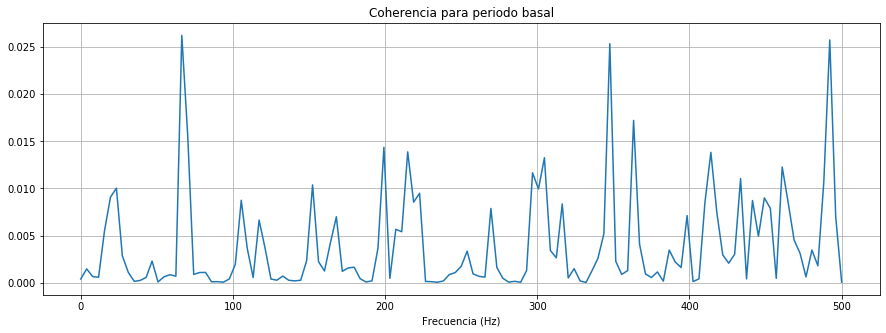

In [26]:
"""Estimación de coherencia en periodo basal"""
EKG_PUL_b,f = coher(EKGz_seg[:,0],PULz_seg[:,0],sr)
EKG_RSP_b,f = coher(EKGz_seg[:,0],RSPz_seg[:,0],sr)
EKG_EMG_b,f = coher(EKGz_seg[:,0],EMGz_seg[:,0],sr)
EMG_RSP_b,f = coher(EMGz_seg[:,0],RSPz_seg[:,0],sr)
EMG_PUL_b,f = coher(EMGz_seg[:,0],PULz_seg[:,0],sr)
PUL_RSP_b,f = coher(PULz_seg[:,0],RSPz_seg[:,0],sr)

plt.figure(figsize = (15,5))
plt.plot(f,EKG_PUL_b)
plt.grid(True)
plt.title('Coherencia para periodo basal')
plt.xlabel('Frecuencia (Hz)')
plt.show()

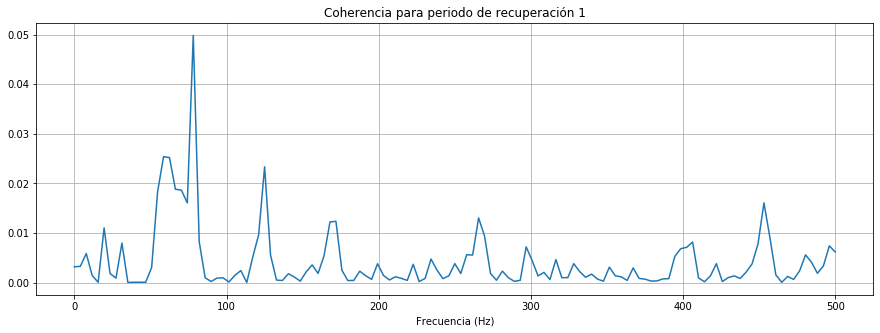

In [27]:
"""Estimación de coherencia en periodo recuperación 1"""
EKG_PUL_r1,f = coher(EKGz_seg[:,1],PULz_seg[:,1],sr)
EKG_RSP_r1,f = coher(EKGz_seg[:,1],RSPz_seg[:,1],sr)
EKG_EMG_r1,f = coher(EKGz_seg[:,1],EMGz_seg[:,1],sr)
EMG_RSP_r1,f = coher(EMGz_seg[:,1],RSPz_seg[:,1],sr)
EMG_PUL_r1,f = coher(EMGz_seg[:,1],PULz_seg[:,1],sr)
PUL_RSP_r1,f = coher(PULz_seg[:,1],RSPz_seg[:,1],sr)

plt.figure(figsize = (15,5))
plt.plot(f,EKG_PUL_r1)
plt.grid(True)
plt.title('Coherencia para periodo de recuperación 1')
plt.xlabel('Frecuencia (Hz)')
plt.show()

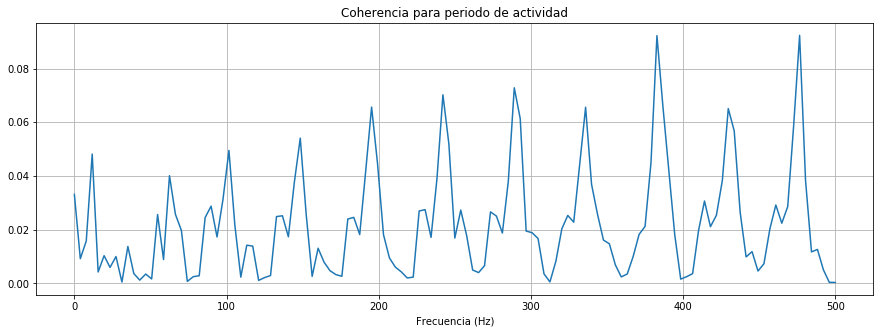

In [28]:
"""Estimación de coherencia en periodo de actividad"""
EKG_PUL_a,f = coher(EKGz_seg[:,2],PULz_seg[:,2],sr)
EKG_RSP_a,f = coher(EKGz_seg[:,2],RSPz_seg[:,2],sr)
EKG_EMG_a,f = coher(EKGz_seg[:,2],EMGz_seg[:,2],sr)
EMG_RSP_a,f = coher(EMGz_seg[:,2],RSPz_seg[:,2],sr)
EMG_PUL_a,f = coher(EMGz_seg[:,2],PULz_seg[:,2],sr)
PUL_RSP_a,f = coher(PULz_seg[:,2],RSPz_seg[:,2],sr)

plt.figure(figsize = (15,5))
plt.plot(f,EKG_PUL_a)
plt.grid(True)
plt.title('Coherencia para periodo de actividad')
plt.xlabel('Frecuencia (Hz)')
plt.show()

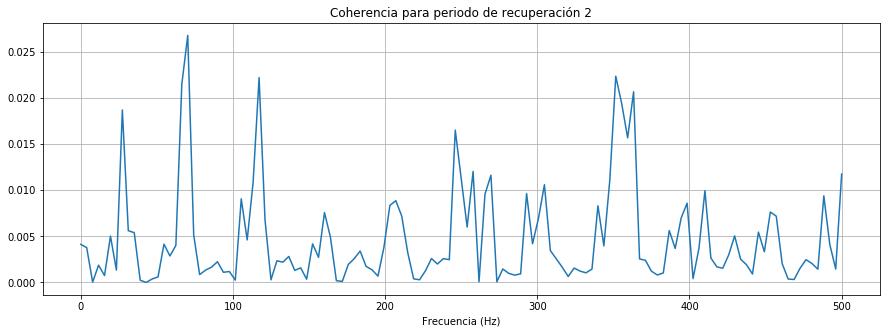

In [29]:
"""Estimación de coherencia en periodo recuperación 2"""
EKG_PUL_r2,f = coher(EKGz_seg[:,3],PULz_seg[:,3],sr)
EKG_RSP_r2,f = coher(EKGz_seg[:,3],RSPz_seg[:,3],sr)
EKG_EMG_r2,f = coher(EKGz_seg[:,3],EMGz_seg[:,3],sr)
EMG_RSP_r2,f = coher(EMGz_seg[:,3],RSPz_seg[:,3],sr)
EMG_PUL_r2,f = coher(EMGz_seg[:,3],PULz_seg[:,3],sr)
PUL_RSP_r2,f = coher(PULz_seg[:,3],RSPz_seg[:,3],sr)

plt.figure(figsize = (15,5))
plt.plot(f,EKG_PUL_r2)
plt.grid(True)
plt.title('Coherencia para periodo de recuperación 2')
plt.xlabel('Frecuencia (Hz)')
plt.show()

## Actividad 3

#### 1. Utilizando un detector de picos, estime la frecuencia cardiaca latido a latido a partir del EKG y la onda de pulso

In [30]:
"""Función para estimación de frecuencia cardiaca"""
"""Nota: Útil solamente para señales de EKG y Pulso con linea base estable"""
def heart_rate(X,umbral,sr):
    """Detección y despliegue de picos"""
    peaks,_ = find_peaks(X, height=umbral, distance=400)
    plt.figure(figsize = (15,5))
    plt.plot(X)
    plt.plot(peaks, X[peaks], "x", color = "red")
    plt.plot(np.ones_like(X)*umbral, "--", color="black")
    plt.grid(True)
    plt.legend(['Señal','Picos detectados','Umbral'],loc = 'lower right')
    plt.show()
    
    """Estimación de frecuencia cardiaca pico a pico"""
    peaks = peaks/sr #Conversión de muestras a tiempo
    frecs = peaks[1:]-peaks[:-1] #Estimación de frecuencia cardiaca pico a pico
    frecs = 60//frecs #Conversión a latidos por minuto
    return frecs

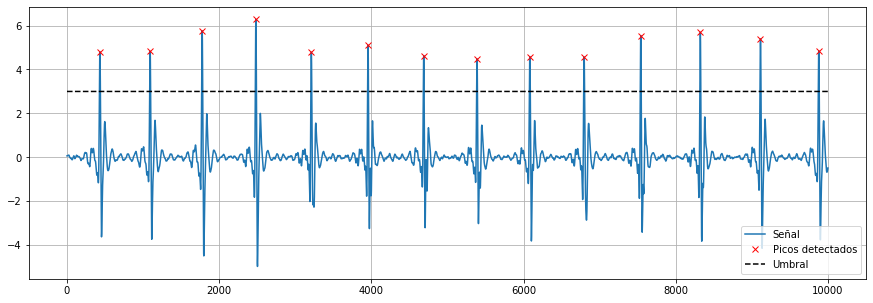

Frecuencia cardiaca estimada pico a pico:  [90. 87. 84. 82. 80. 81. 85. 86. 84. 80. 76. 75. 78.]
Frecuencia cardiaca promedio:  82


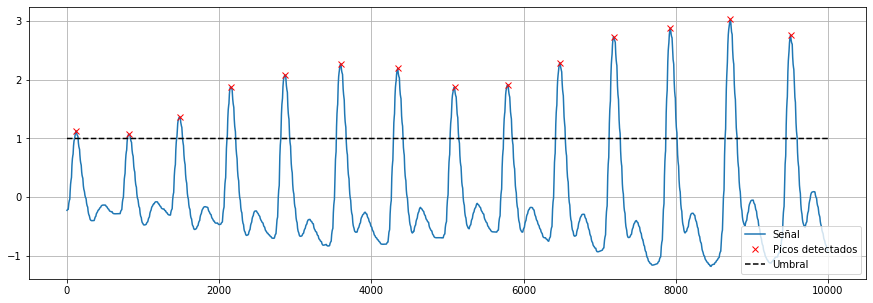

Frecuencia cardiaca estimada pico a pico:  [86. 89. 89. 83. 81. 80. 80. 85. 87. 85. 80. 76. 76.]
Frecuencia cardiaca promedio:  82


In [31]:
"""Estimación de frecuencia cardiaca pico a pico"""
#Variable para controlar el segmento que se desea procesar
#0 -> basal    1 -> recuperación 1    2 -> actividad    3 -> recuperación 2
segmento = 1

HR_ekg = heart_rate(EKGz_seg[:,segmento],3,sr)
print("Frecuencia cardiaca estimada pico a pico: ", HR_ekg)
print("Frecuencia cardiaca promedio: ",int(HR_ekg.mean()))
HR_pul = heart_rate(PULz_seg[:,segmento],1,sr)
print("Frecuencia cardiaca estimada pico a pico: ", HR_pul)
print("Frecuencia cardiaca promedio: ",int(HR_pul.mean()))

#### 2. ¿Existe correlación entre dichas frecuencias?

In [32]:
print('Coeficiente de correlación entre frecuencias cardiacas de EKG y PUL:')
print(corre_per(HR_ekg,HR_pul))

Coeficiente de correlación entre frecuencias cardiacas de EKG y PUL:
0.736205145508862


Sí. Ya que los valores de frecuencia cardiaca (pico a pico y promedio) en ambas señales suelen ser muy similares o bien las mismas

#### 3. Utilice la transformada de Hilbert y la regla trapezoidal para obtener el área bajo la curva del EMG que es un estimador de las ﬁbras reclutadas en una contracción (recuerde que el EMG está segmentado en periodos basales y de actividad)

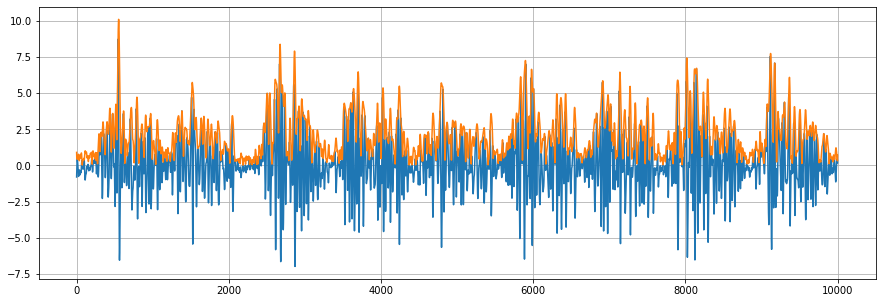

Área bajo la curva:
21.54380683859945


In [33]:
"""Variable para controlar el segmento que se desea procesar
0 -> basal    1 -> recuperación 1    2 -> actividad    3 -> recuperación 2"""
segmento = 2

"""Gráficas"""
H = hilbert(EMGz_seg[:,segmento])
plt.figure(figsize = (15,5))
plt.plot(EMGz_seg[:,segmento])
plt.plot(np.abs(H))
plt.grid(True)
plt.show()

"""Regla trapezoidal para estimación de área bajo la curva"""
print ('Área bajo la curva:')
print( np.trapz( np.abs(H   ),dx=1/sr ) )

In [34]:
"""Envovlente método 2"""
def env_2 (signal,sr):
    
    fc  = np.array([8])/sr
    N   = 2
    b,a = butter(N,fc,btype='low')
    
    
    signal = signal**2    
    signal = filtfilt(b,a,signal)
    return signal.copy()

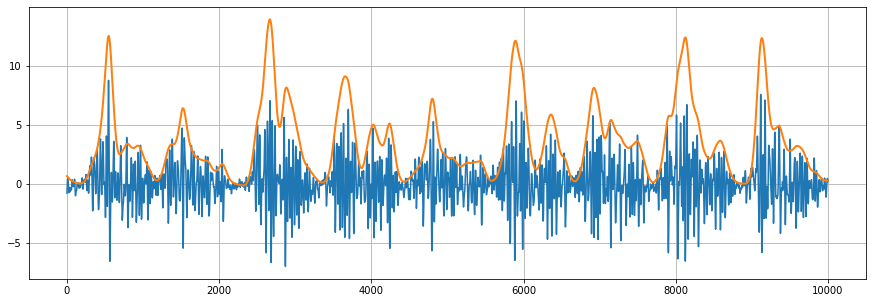

Área bajo la curva:
35.0300606816034


In [35]:
"""Variable para controlar el segmento que se desea procesar
0 -> basal    1 -> recuperación 1    2 -> actividad    3 -> recuperación 2"""
segmento = 2

"""Gráficas"""
H1 = env_2(EMGz_seg[:,segmento],sr)
plt.figure(figsize = (15,5))
plt.plot(EMGz_seg[:,segmento])
plt.plot(H1,linewidth=2)
plt.grid(True)
plt.show()

"""Regla trapezoidal para estimación de área bajo la curva"""
print ('Área bajo la curva:')
print( np.trapz(H1   ,dx=1/sr ) )

#### 4. ¿Existe correlación entre las frecuencias cardiacas latido a latido y el área bajo la curva del EMG?

El coeficiente de correlación no se puede calcular ya que el área bajo la curva no es un arreglo al cual podamos aplicarle la función de correlación, sin embargo, se observa que cuando el área bajo la curva es máxima, la frecuencia cardiaca promedio también es máxima